In [377]:
import sklearn as sk
import numpy as np
import pandas as pd
import time
from sklearn.cross_validation import KFold
from sklearn import tree
from sklearn import ensemble
from scipy.optimize import linprog
from sklearn import datasets
from scipy import misc
from io import StringIO
import copy
import sys
from numpy.random import uniform
from unittest import *
from numpy.random import normal
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import os
import struct
import numpy as np
from sklearn.datasets import make_classification
from math import copysign

import matplotlib.pylab as plt
%matplotlib inline

## nash function impl

In [378]:
def nash_equilibrium_points(A, min_threshold):
    nash = np.zeros((A.shape))
    for i in range(A.shape[0]):
        for idx in np.argwhere(A[i] == np.min(A[i])):
            nash[i][idx] += 1
            
    for i in range(A.shape[1]):
        for idx in np.argwhere(A[:, i] == np.max(A[:, i]))[0]:
            nash[idx][i] += 1

    points_vals = [[i, j] for i in range(nash.shape[0]) for j in range(nash.shape[1]) if nash[i][j] == 2]

    if not len(points_vals):
        print 'no points'
        return None
    else:
        for point in points_vals:
            print('value', A[point[0]][point[1]] - min_threshold, 'First strategy', point[0] + 1, \
               'Second strategy', point[1] + 1)
        return points_vals
    return 0

In [379]:
def nash_equilibrium(A):
    print np.min(A)
    min_threshold = np.abs(np.min(A)) + 1
    A += min_threshold

    points = nash_equilibrium_points(A, min_threshold)
    if points and len(points) == 1:
        first = np.zeros(A.shape[0])
        second = np.zeros(A.shape[1])
        first[points[0][0]] = 1
        second[points[0][1]] = 1
        return first, second, A[points[0][0]][points[0][1]] - min_threshold
    b, w = np.ones(A.shape[0]), -np.ones(A.shape[0])
    res_first = linprog(w, A_ub = A, b_ub = b, options = {"disp": False})
    b, w = -np.ones(A.shape[1]), np.ones(A.shape[1])
    res_second = linprog(w, A_ub = -A.T, b_ub = b, options = {"disp": False})

    game_value = np.sum(res_second.get("x"))
    
    return res_first.get("x") / game_value, res_second.get("x") / game_value, (1 / game_value) - min_threshold


## Draw function

In [420]:
def draw(p, q):
    x1, x2 = np.arange(p.shape[0]), np.arange(p.shape[0])
    for pair in zip([x1, x2], [p, q]):
        plt.figure(figsize=(8,6), dpi = 80)
        plt.ylabel('strategy selection probability')
        plt.xlabel('strategy number')
        plt.grid(True)
        plt.scatter(pair[0], pair[1], color='blue')
        map(lambda x, y: plt.plot([x, x], [0.0, y], color = 'blue'), pair[0], pair[1])
        plt.show()

## unit tests

In [421]:
class UnitTest(unittest.TestCase):
 
    def runTest(self):
        pass
 
    def test_number1(self):
        A = np.array([[8, 4, 7], [6, 5, 9], [7, 7, 8]])
        p = np.array([0, 0, 1], dtype=np.float)
        q = np.array([0, 1, 0], dtype=np.float)
        val = 7
        a, b, c = nash_equilibrium(A)
        self.assertEqual(a.tolist(), p.tolist())
        self.assertEqual(b.tolist(), q.tolist())
        self.assertEqual(c, val)
 
    def test_number2(self):
        A = np.array([[-1, 1], [1, -1]])
        p = np.array([0.5, 0.5])
        q = np.array([0.5, 0.5])
        val = 0
        a, b, c = nash_equilibrium(A)
        assert(np.sum(np.abs(a - p)) < 0.001 )
        assert(np.sum(np.abs(b - q)) < 0.001 )
        self.assertEqual(c, val)
        
    def test_number3(self):
        A = np.array([[2, 5], [6, 4]])
        q = np.array([0.4, 0.6])
        p = np.array([0.2, 0.8])
        val = 4.4
        a, b, c = nash_equilibrium(A)
        print c
        assert(np.sum(np.abs(a - p)) < 0.001 )
        assert(np.sum(np.abs(b - q)) < 0.001 )
        assert(np.abs(val - c) < 0.001)
        

In [422]:
tests = UnitTest()
suite = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(suite)

...

4
('value', 7, 'First strategy', 3, 'Second strategy', 2)
-1
no points
2
no points
4.4



----------------------------------------------------------------------
Ran 3 tests in 0.016s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## Read matrix and execute function

write matrix shape
2
2
3
1
3
4
1.0
no points


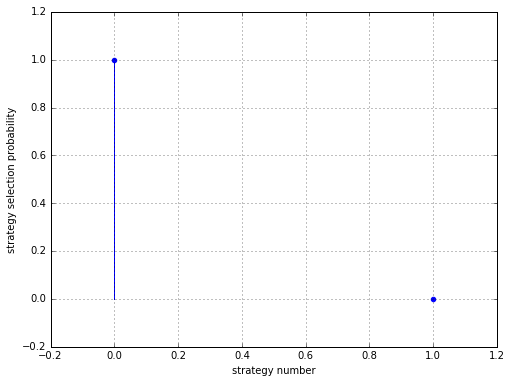

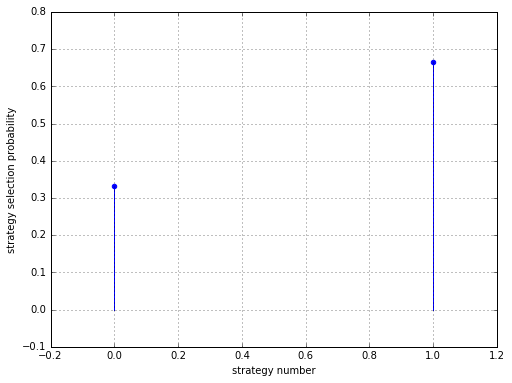

In [423]:
print 'write matrix shape'
x = int(input())
y = int(input())
A = np.zeros((x, y))
for i in range(x):
    for j in range(y):
        A[i][j] = float(input())
        
p, q, v = nash_equilibrium(A)
draw(p, q)